In [33]:
from dotenv import load_dotenv
import os
from sqlalchemy import create_engine
import glob

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [3]:
# Loads variables from .env
load_dotenv()  

DB_HOST = os.getenv('DB_HOST')
DB_PORT = os.getenv('DB_PORT')
DB_NAME = os.getenv('DB_NAME')
DB_USER = os.getenv('DB_USER')
DB_PASSWORD = os.getenv('DB_PASSWORD')

In [4]:
# Create SQLAlchemy engine
engine = create_engine(
    f'postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}'
)

In [ ]:
def load_query(filepath):
    with open(filepath, 'r') as file:
        return file.read()

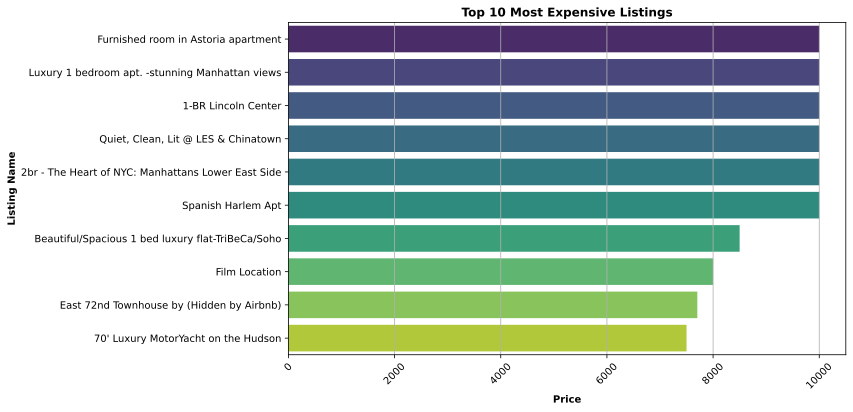

In [23]:
# Load the "Top 10 Most Expensive Listings" query from listings.sql
query = """
SELECT * FROM listings_with_details
ORDER BY price DESC
LIMIT 10;
"""

df = pd.read_sql(query, engine)
df.head()

# Visualize the data
plt.figure(figsize=(10, 6))
sns.barplot(y='listing_name', x='price', data=df,hue='listing_name',palette='viridis')
plt.title('Top 10 Most Expensive Listings',fontweight='bold')
plt.xlabel('Price',fontweight='bold')
plt.ylabel('Listing Name',fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='x')
plt.savefig('../visualisations/top_10_expensive_listings.svg')
plt.show()

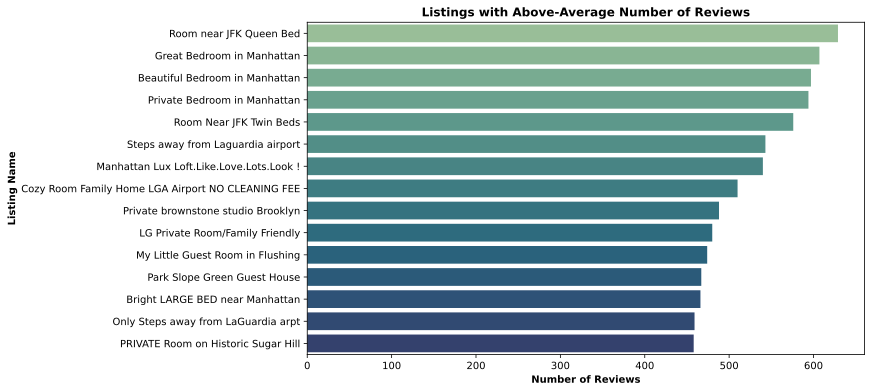

In [53]:
query = """
SELECT listing_name, price, number_of_reviews
FROM listings_with_details
WHERE number_of_reviews > (SELECT AVG(number_of_reviews) FROM listings_with_details)
ORDER BY number_of_reviews DESC
LIMIT 15;
"""
df = pd.read_sql(query, engine)
plt.figure(figsize=(10, 6))
sns.barplot(y='listing_name', x='number_of_reviews',hue='listing_name', data=df, palette='crest')
plt.title('Listings with Above-Average Number of Reviews', fontweight='bold')
plt.xlabel('Number of Reviews', fontweight='bold')
plt.ylabel('Listing Name', fontweight='bold')
plt.savefig('../visualisations/above_avg_reviews.svg')
plt.show()

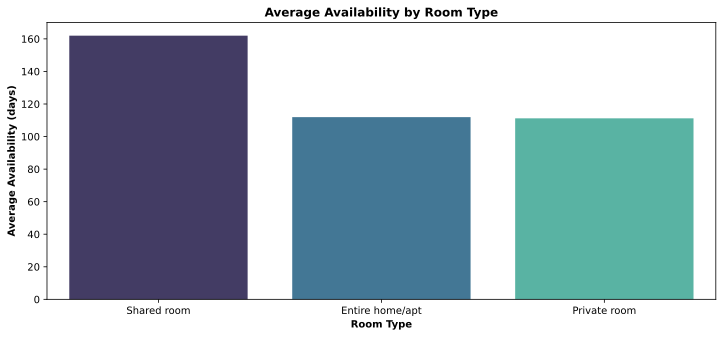

In [52]:
query = """
SELECT room_type, AVG(availability_365) AS avg_availability
FROM listings_with_details
GROUP BY room_type
ORDER BY avg_availability DESC;
"""
df = pd.read_sql(query, engine)
plt.figure(figsize=(12, 5))
sns.barplot(x='room_type', y='avg_availability',hue='room_type', data=df, palette='mako')
plt.title('Average Availability by Room Type', fontweight='bold')
plt.xlabel('Room Type', fontweight='bold')
plt.ylabel('Average Availability (days)', fontweight='bold')
plt.savefig('../visualisations/avg_availability_by_room_type.svg')
plt.show()

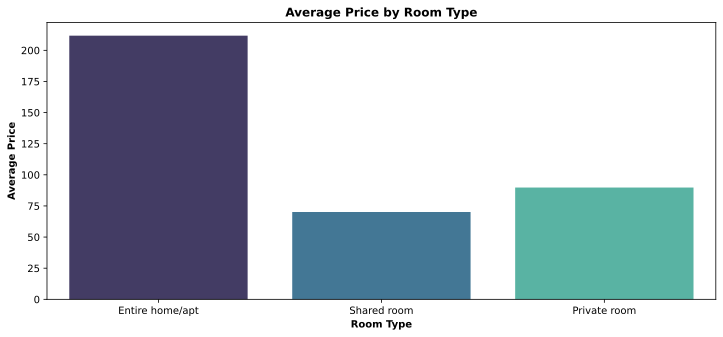

In [38]:
query = """
SELECT room_type, AVG(price) AS avg_price
FROM listings_with_details
GROUP BY room_type;
"""
df = pd.read_sql(query, engine)
plt.figure(figsize=(12, 5))
sns.barplot(x='room_type', y='avg_price', data=df,hue='room_type', palette='mako')
plt.title('Average Price by Room Type', fontweight='bold')
plt.xlabel('Room Type', fontweight='bold')
plt.ylabel('Average Price', fontweight='bold')
plt.savefig('../visualisations/avg_price_by_room_type.svg')
plt.show()

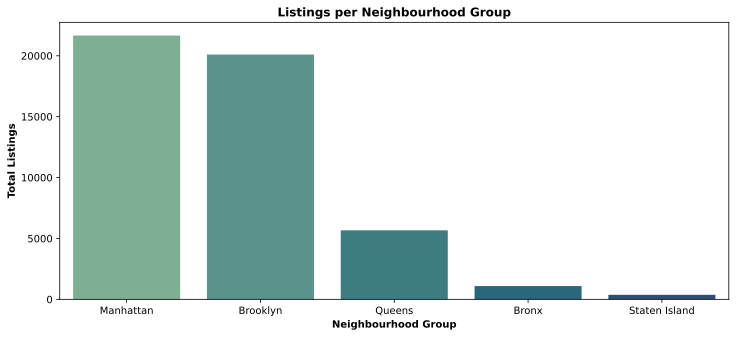

In [40]:
query = """
SELECT neighbourhood_group, COUNT(*) AS total_listings
FROM listings_with_details
GROUP BY neighbourhood_group
ORDER BY total_listings DESC;
"""
df = pd.read_sql(query, engine)
plt.figure(figsize=(12, 5))
sns.barplot(x='neighbourhood_group', y='total_listings',hue='neighbourhood_group', data=df, palette='crest')
plt.title('Listings per Neighbourhood Group', fontweight='bold')
plt.xlabel('Neighbourhood Group', fontweight='bold')
plt.ylabel('Total Listings', fontweight='bold')
plt.savefig('../visualisations/listings_per_neighbourhood_group.svg')
plt.show()

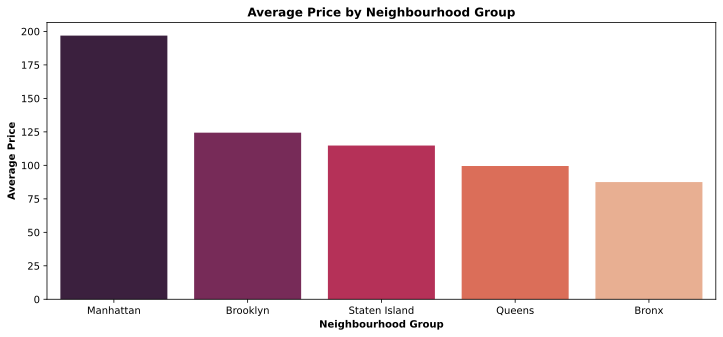

In [58]:
query = """
SELECT neighbourhood_group, AVG(price) AS avg_price
FROM listings_with_details
GROUP BY neighbourhood_group
ORDER BY avg_price DESC;
"""
df = pd.read_sql(query, engine)
plt.figure(figsize=(12, 5))
sns.barplot(x='neighbourhood_group', y='avg_price',hue='neighbourhood_group', data=df, palette='rocket')
plt.title('Average Price by Neighbourhood Group', fontweight='bold')
plt.xlabel('Neighbourhood Group', fontweight='bold')
plt.ylabel('Average Price', fontweight='bold')
plt.savefig('../visualisations/avg_price_by_neigh_group.svg')
plt.show()

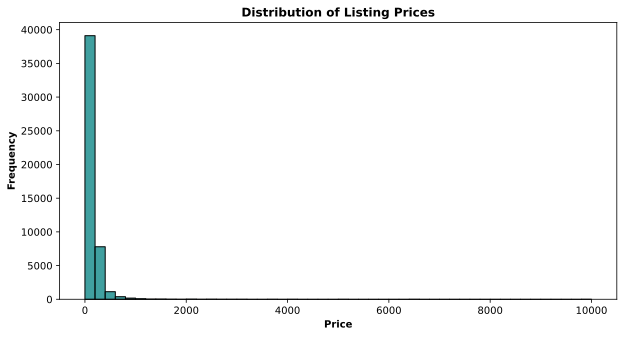

In [ ]:
# Price Distribution
query = """
SELECT price FROM listings_with_details;
"""
df = pd.read_sql(query, engine)
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=50, color='teal')
plt.title('Distribution of Listing Prices', fontweight='bold')
plt.xlabel('Price', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.savefig('../visualisations/price_distribution.svg')
plt.show()

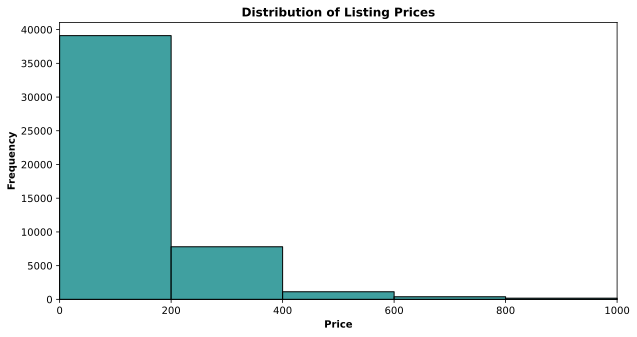

In [ ]:
# Price Distribution without Outliers

query = """
SELECT price FROM listings_with_details;
"""
df = pd.read_sql(query, engine)
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=50, color='teal')
plt.title('Distribution of Listing Prices', fontweight='bold')
plt.xlabel('Price', fontweight='bold')
plt.xlim(0, 1000)
plt.ylabel('Frequency', fontweight='bold')
plt.savefig('../visualisations/price_distribution.svg')
plt.show()

In [43]:
query = """
SELECT latitude, longitude, price FROM listings_with_details;
"""
df = pd.read_sql(query, engine)
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', hue='price', data=df, palette='viridis', alpha=0.6, legend=False)
plt.title('Geographic Distribution of Listings (by Price)', fontweight='bold')
plt.xlabel('Longitude', fontweight='bold')
plt.ylabel('Latitude', fontweight='bold')
plt.savefig('../visualisations/geographic_distribution.svg')
plt.show()

ProgrammingError: (psycopg2.errors.UndefinedColumn) column "latitude" does not exist
LINE 2: SELECT latitude, longitude, price FROM listings_with_details...
               ^

[SQL: 
SELECT latitude, longitude, price FROM listings_with_details;
]
(Background on this error at: https://sqlalche.me/e/20/f405)

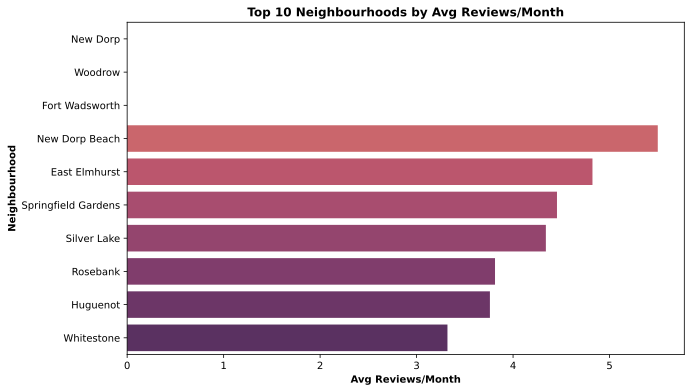

In [48]:
query = """
SELECT neighbourhood, AVG(reviews_per_month) AS avg_reviews_per_month
FROM listings_with_details
GROUP BY neighbourhood
ORDER BY avg_reviews_per_month DESC
LIMIT 10;
"""
df = pd.read_sql(query, engine)
plt.figure(figsize=(10, 6))
sns.barplot(y='neighbourhood', x='avg_reviews_per_month', hue='neighbourhood', data=df, palette='flare')
plt.title('Top 10 Neighbourhoods by Avg Reviews/Month', fontweight='bold')
plt.xlabel('Avg Reviews/Month', fontweight='bold')
plt.ylabel('Neighbourhood', fontweight='bold')
plt.savefig('../visualisations/top_neigh_reviews_per_month.svg')
plt.show()

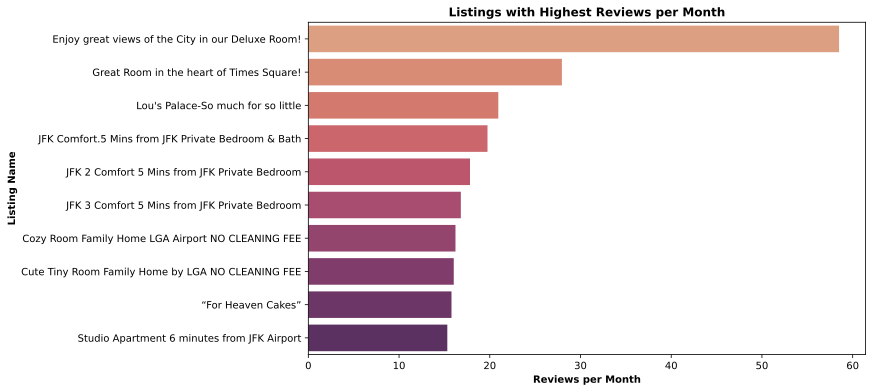

In [63]:
query = """
SELECT listing_name, reviews_per_month
FROM listings_with_details
WHERE reviews_per_month IS NOT NULL
ORDER BY reviews_per_month DESC
LIMIT 10;
"""
df = pd.read_sql(query, engine)
plt.figure(figsize=(10, 6))
sns.barplot(y='listing_name', x='reviews_per_month',hue='listing_name', data=df, palette='flare')
plt.title('Listings with Highest Reviews per Month', fontweight='bold')
plt.xlabel('Reviews per Month', fontweight='bold')
plt.ylabel('Listing Name', fontweight='bold')
plt.savefig('../visualisations/highest_reviews_per_month.svg')
plt.show()

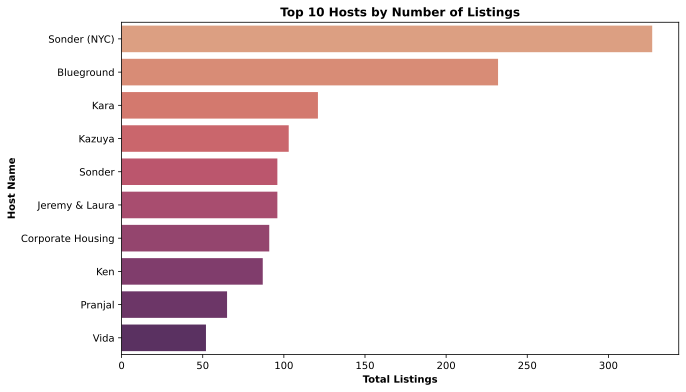

In [55]:
query = """
SELECT host_name, total_listings
FROM host_activity
ORDER BY total_listings DESC
LIMIT 10;
"""
df = pd.read_sql(query, engine)
plt.figure(figsize=(10, 6))
sns.barplot(y='host_name', x='total_listings',hue='host_name', data=df, palette='flare')
plt.title('Top 10 Hosts by Number of Listings', fontweight='bold')
plt.xlabel('Total Listings', fontweight='bold')
plt.ylabel('Host Name', fontweight='bold')
plt.savefig('../visualisations/top_hosts_listings.svg')
plt.show()

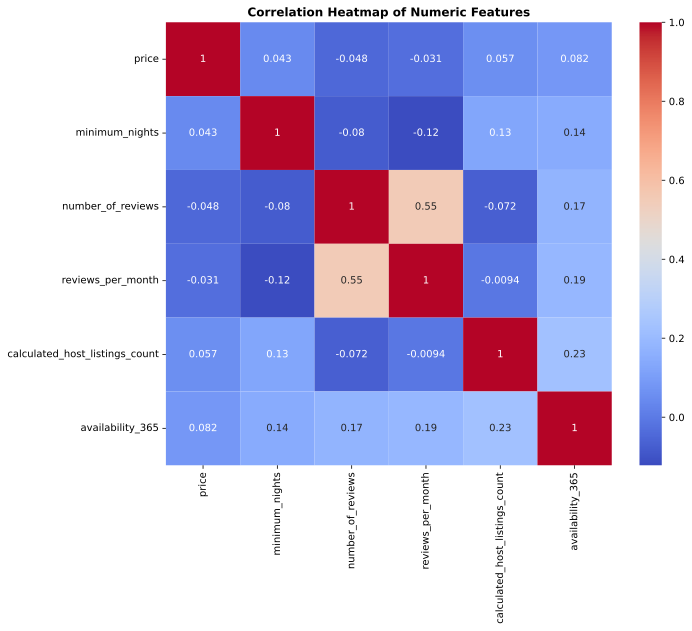

In [59]:
query = """
SELECT price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365
FROM listings_with_details;
"""
df = pd.read_sql(query, engine)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features', fontweight='bold')
plt.savefig('../visualisations/correlation_heatmap.svg')
plt.show()